In [2]:
import pandas as pd
import sklearn

df = pd.read_excel('../data/wpdb.xlsx')
df.head(5)

,UID,CenterId,StudentName,SchoolName,SchoolGrade,SchoolLevel,StudentGrade,Address,Address2,StudentStatus,cs_count,max_sche_date,withdraw_csl_count,remain_csl_count,supply_count,clinic_count,abs_count,pre_count,target
0,00249736-53A0-4D68-8CB9-DFA306A33435,15,임현승,성동중학교,1학년,high,17,NaN,NaN,drop,5,2023-11-17,0,3,0,0,1,41,0
1,00515C99-00A6-444B-93A3-73D7BB0852E5,15,노해율,내성중학교,3학년,middle,16,부산 동래구 금정마을로 135-9(동래 래미안 아이파크),2단지-5호차,present,5,2023-07-20,0,19,0,0,0,52,0
2,00600FC7-C7DE-40DE-AD7D-A1D94DD5D212,16,신아인,경일중학교,3학년,middle,16,부산 강서구 명지국제7로 110(더 힐 시그니처),NaN,present,8,2024-02-15,0,0,0,0,0,0,1
3,0063DEBD-095C-4804-A246-7EDD5160419A,14,손태윤,브니엘예술중학교,3학년,middle,16,NaN,NaN,drop,2,2023-10-01,0,0,0,0,0,6,0
4,007378EC-9A44-4A75-8B1A-70D13FBE7832,16,오주안,오션중학교,3학년,middle,16,NaN,명지 오션 11로 87,present,29,2024-02-15,0,23,0,0,1,278,1


In [5]:
from sklearn.model_selection import train_test_split

X=df[df.columns[6:]]
X = X.drop(columns = ['Address','Address2', 'max_sche_date', 'StudentStatus', 'abs_count', 'supply_count', 'clinic_count'])
X['StudentGrade'].replace({15: 0, 16: 1, 17:2}, inplace=True)

# X = X[:, 5]
X = X.drop(['target'], axis=1)
y = df['target']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X

,StudentGrade,cs_count,withdraw_csl_count,remain_csl_count,pre_count
0,2,5,0,3,41
1,1,5,0,19,52
2,1,8,0,0,0
3,1,2,0,0,6
4,1,29,0,23,278
...,...,...,...,...,...
2492,0,2,1,20,64
2493,1,9,0,0,0
2494,1,3,1,9,23
2495,2,6,0,0,0


In [6]:
X.describe()

,StudentGrade,cs_count,withdraw_csl_count,remain_csl_count,pre_count
count,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000
mean,1.080497,10.095715,0.236684,8.060473,64.474169
std,0.822076,10.497140,0.648321,9.690521,80.639647
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,1.000000,4.000000
50%,1.000000,6.000000,0.000000,4.000000,31.000000
75%,2.000000,14.000000,0.000000,13.000000,95.000000
max,2.000000,62.000000,19.000000,64.000000,396.000000


C:\Users\wogus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\wogus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\wogus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\wogus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

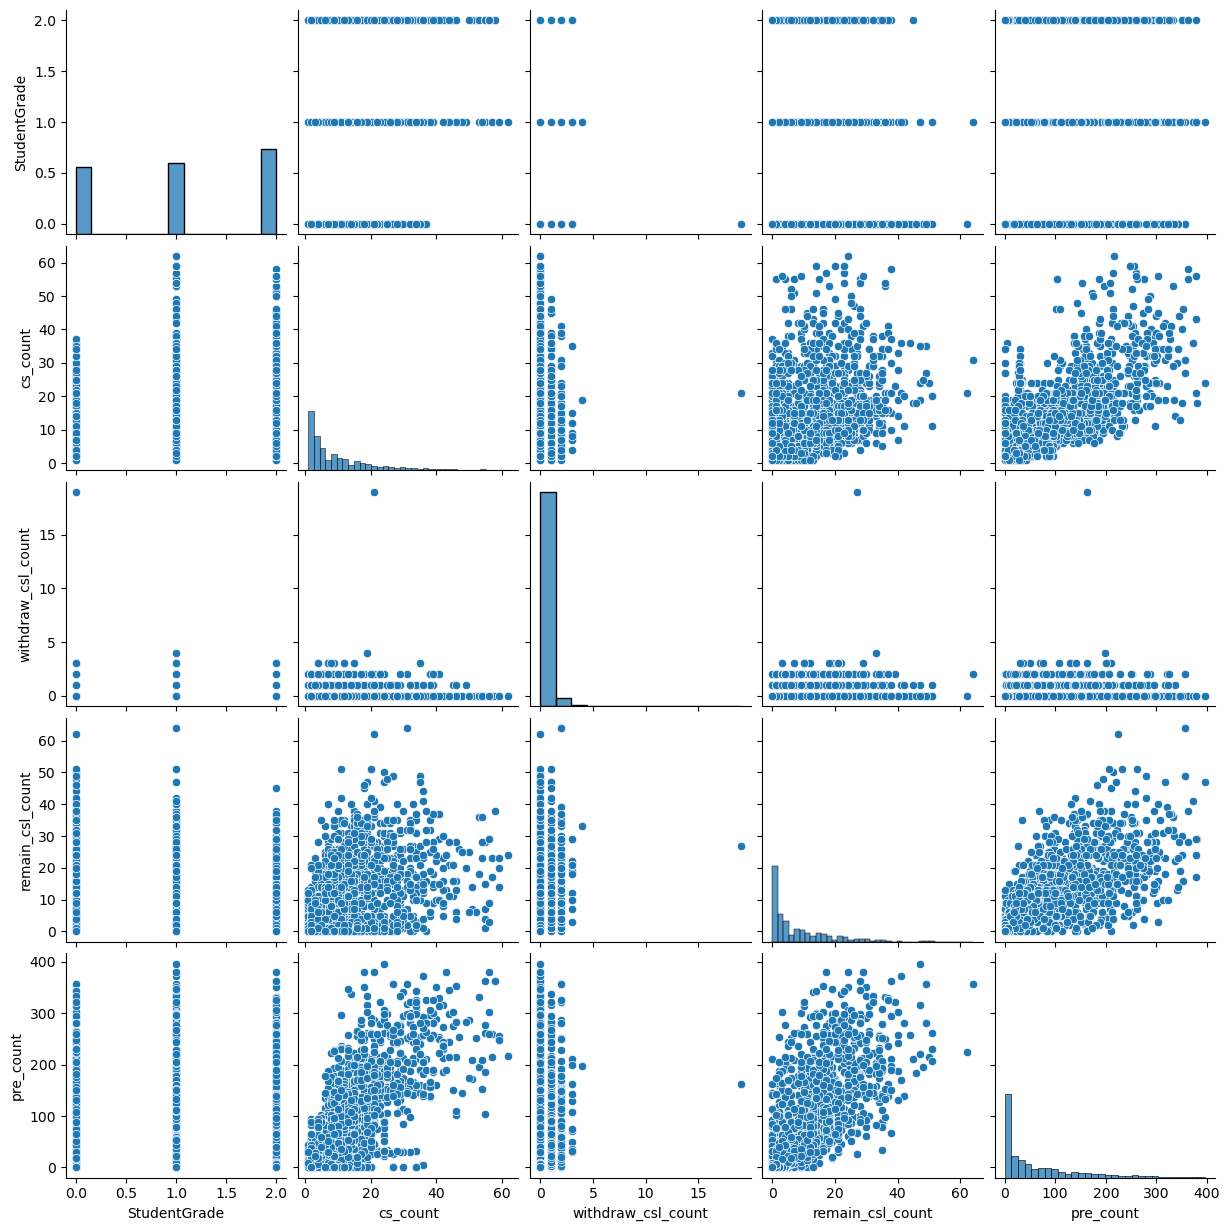

In [18]:
import seaborn as sns

sns.pairplot(X)

In [7]:
X_reshape = X[["cs_count", "pre_count"]]


In [8]:
X_reshape

,cs_count,pre_count
0,5,41
1,5,52
2,8,0
3,2,6
4,29,278
...,...,...
2492,2,64
2493,9,0
2494,3,23
2495,6,0


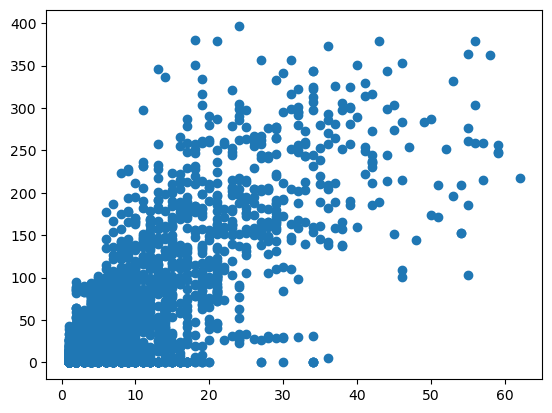

In [10]:
import matplotlib.pyplot as plt

plt.scatter(X_reshape["cs_count"], X_reshape["pre_count"])

In [36]:
from sklearn.cluster import DBSCAN
import numpy as np 
dbscan = DBSCAN(eps=1, min_samples=4, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X_reshape)

new_array = np.unique(dbscan_labels)

In [37]:
len(new_array)

46

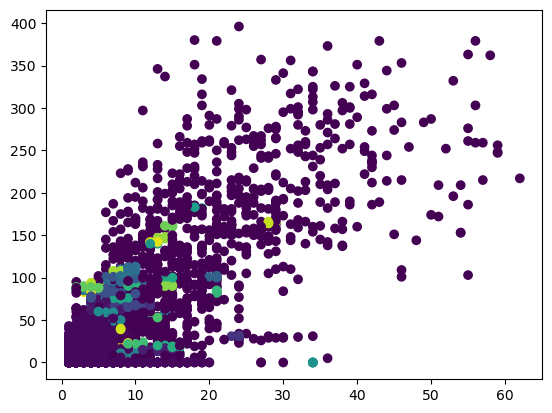

In [38]:
plt.scatter(X_reshape["cs_count"], X_reshape["pre_count"], c=dbscan_labels)

In [39]:
X_reshape.describe()

,cs_count,pre_count
count,2497.000000,2497.000000
mean,10.095715,64.474169
std,10.497140,80.639647
min,1.000000,0.000000
25%,2.000000,4.000000
50%,6.000000,31.000000
75%,14.000000,95.000000
max,62.000000,396.000000


In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

In [41]:
sc1 = StandardScaler()
sc2 = RobustScaler()
sc3 = MinMaxScaler()

In [42]:
x_sc_1 = sc1.fit_transform(X_reshape)
x_sc_2 = sc2.fit_transform(X_reshape)
x_sc_3 = sc3.fit_transform(X_reshape)

In [45]:
x_sc_1

array([[-0.48553562, -0.29115791],
       [-0.48553562, -0.15472126],
       [-0.19968626, -0.79969451],
       ...,
       [-0.67610187, -0.51441788],
       [-0.3902525 , -0.79969451],
       [-0.10440313,  0.00652206]])

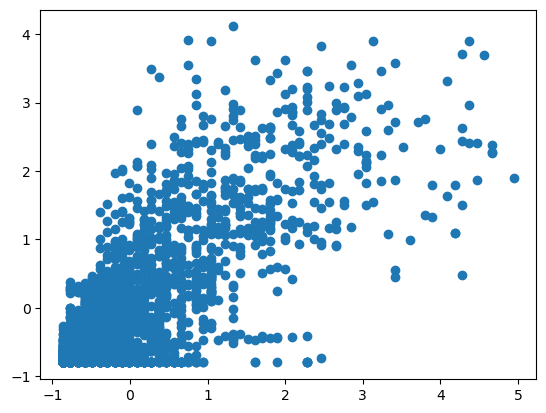

In [49]:
plt.scatter(x_sc_1[:, 0], x_sc_1[:, 1])

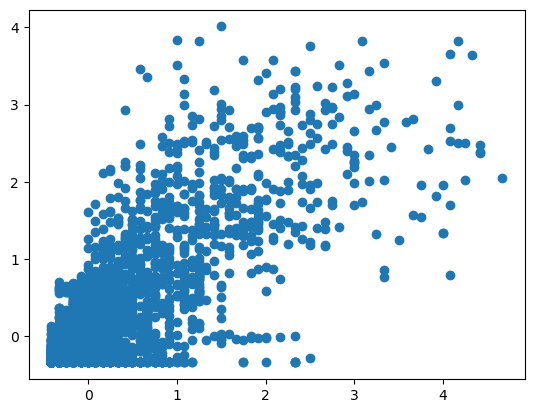

In [50]:
plt.scatter(x_sc_2[:, 0], x_sc_2[:, 1])

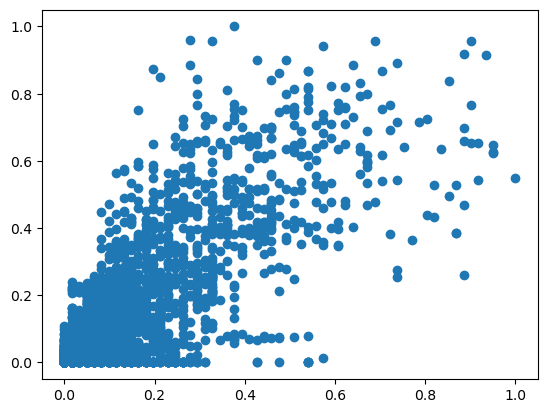

In [51]:
plt.scatter(x_sc_3[:, 0], x_sc_3[:, 1])

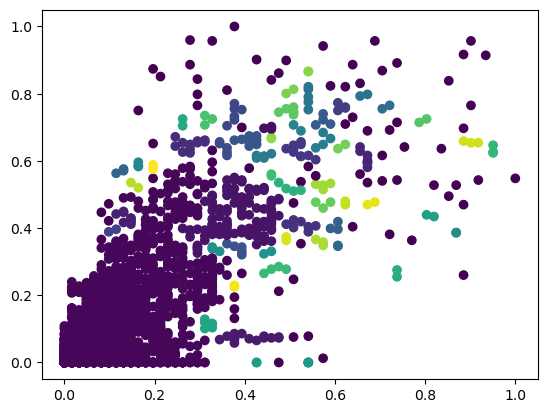

In [64]:
dbscan = DBSCAN(eps=0.025, min_samples=2, metric='euclidean')
dbscan_labels = dbscan.fit_predict(x_sc_3)
np.unique(dbscan_labels)
plt.scatter(x_sc_3[:, 0], x_sc_3[:, 1], c=dbscan_labels)

이러한 데이터셋에서 이진분류에서 과연 DBSCAN이 의미가 있을까?


### K-means

In [52]:
from sklearn.cluster import KMeans

In [70]:
model = KMeans(n_clusters=2)

cluster = model.fit_predict(X_reshape)
len(cluster)

C:\Users\wogus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\wogus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(


2497

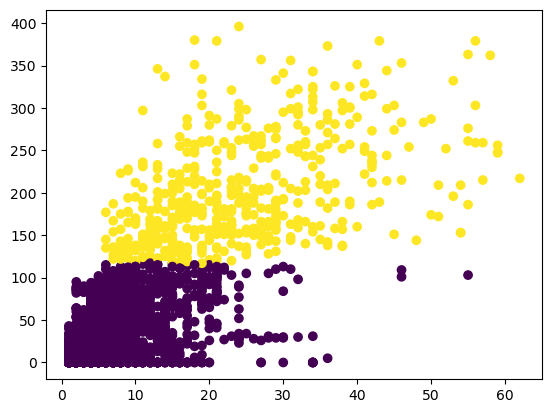

In [71]:
plt.scatter(X_reshape["cs_count"], X_reshape["pre_count"], c=cluster)